### Whether malignant lesions occur more along some gender or age line (show subplots from matplotlib)? 

### What is the essential frequency distribution of lesion diagnosis? Is it skewed (overall and within categories)? 

Histogram where each thing is the type of diagnosis vs. its count (scatter plots, bar charts, etc.)

In [68]:
import PIL
import cv2
import os
from os import listdir
from os.path import isfile, join
import json
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
directory = os.getcwd().split("\\")[:-1]
directory.append('ISIC-Archive-Downloader')

In [4]:
new_directory = ""
for component in directory:
    new_directory += component
    new_directory += "\\"

In [5]:
if 'Data' in listdir(new_directory):
    print("You have data")
    all_files = new_directory + 'Data'
    images = all_files + '\\Images'
    descriptions = all_files + '\\Descriptions'
    
else:
    print("You need to download the images using the ISIC Downloader")

You have data


In [6]:
des_paths = [join(descriptions, f) for f in listdir(descriptions) if isfile(join(descriptions, f))]

In [52]:
malignant = []
benign = []
for im in des_paths:
    with open(im) as json_file:
        j = json.load(json_file)

        if j["meta"]["clinical"]["benign_malignant"] == "malignant":

            malignant.append(j["meta"]["clinical"]["age_approx"])
            malignant.append(j["meta"]["clinical"]["sex"])

        elif j["meta"]["clinical"]["benign_malignant"] == "benign":

            benign.append(j["meta"]["clinical"]["age_approx"])
            benign.append(j["meta"]["clinical"]["sex"])

In [53]:
# Malignant for male and female
# Benign for male and female
conf_mat = np.array([[benign.count('female'), benign.count('male')],
                     [malignant.count('female'), malignant.count('male')]])

group_names = ['Benign (F)','Benign (M)','Malig. (F)','Malig. (M)']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# Malignant for age
# Benign for age
b_age = [x for x in benign if isinstance(x, int)]
m_age = [x for x in malignant if isinstance(x, int)]

flags = ['benign'] * len(b_age) + ['malignant'] * len(m_age)

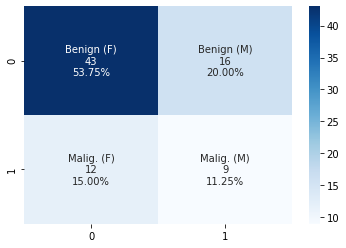

In [67]:
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

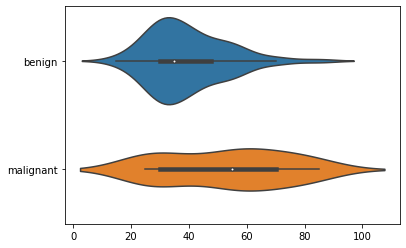

In [66]:
sns.violinplot(b_age + m_age,flags) # need to validate

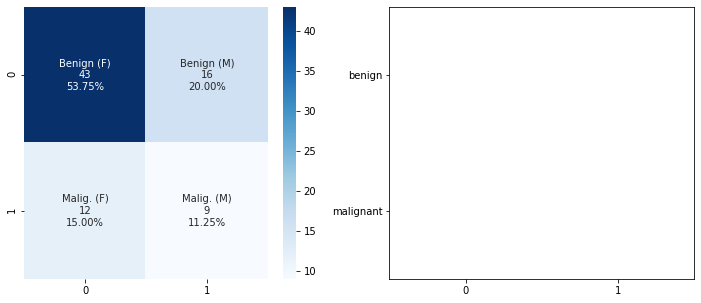

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues', ax=ax1)

sns.violinplot(b_age + m_age, flags, ax=ax2)

plt.show()

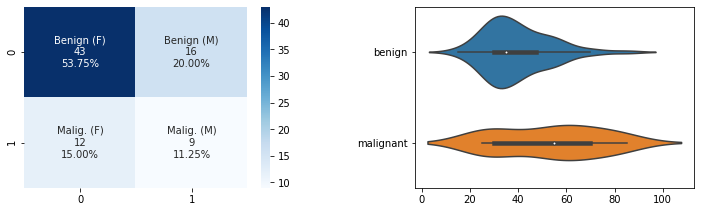

In [109]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.violinplot(b_age + m_age, flags, ax=ax)